In [115]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [116]:

average_values_by_occupation = df.groupby('Occupation')[['Quality of Sleep', 'Physical Activity Level', 'Stress Level']].mean().reset_index()

average_values_by_occupation


,Occupation,Quality of Sleep,Physical Activity Level,Stress Level
0,Accountant,7.891892,58.108108,4.594595
1,Doctor,6.647887,55.352113,6.732394
2,Engineer,8.412698,51.857143,3.888889
3,Lawyer,7.893617,70.425532,5.063830
4,Manager,7.000000,55.000000,5.000000
5,Nurse,7.369863,78.589041,5.547945
6,Sales Representative,4.000000,30.000000,8.000000
7,Salesperson,6.000000,45.000000,7.000000
8,Scientist,5.000000,41.000000,7.000000
9,Software Engineer,6.500000,48.000000,6.000000


## Cleaning

In [117]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [119]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [120]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Normal         219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [121]:
df.duplicated().sum()

0

In [122]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [123]:
df[['SYSTOLIC', 'DIASTOLIC']] = df['Blood Pressure'].str.split('/', expand=True)

df['SYSTOLIC'] = df['SYSTOLIC'].astype(float)
df['DIASTOLIC'] = df['DIASTOLIC'].astype(float)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [124]:
data = df.copy()

data = data.drop(['Person ID', 'Blood Pressure'], axis=1)

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Normal,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


## Analysis and Exploratory Data Analysis _EDA_

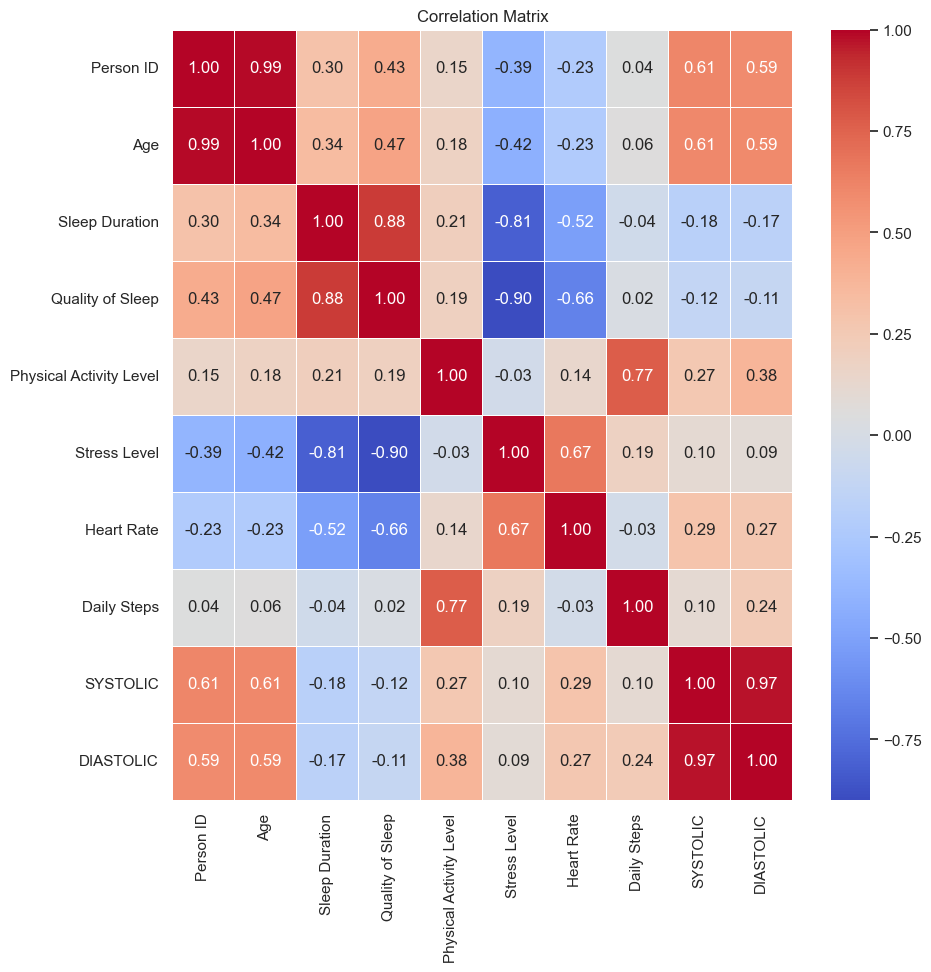

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr = df[num_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [126]:
import plotly.express as px

# Assuming 'data' is your DataFrame and it contains a column named 'Sleep Disorder'
fig = px.histogram(data, x='Sleep Disorder', title='Distribution of Sleep Disorder',
                   labels={'Sleep Disorder': 'Sleep Disorder'}, 
                   color='Sleep Disorder',
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='Sleep Disorder',
    yaxis_title='Count',
    title={
        'text': "Distribution of Sleep Disorder",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
    bargap=0,  # Set the gap between bars to 0
    bargroupgap=0.1  # Set the gap between groups of bars
)

# Set opacity of the bars
fig.update_traces(opacity=0.75)

fig.show()

In [127]:
fig = px.bar(data, x='Sleep Disorder', color='Gender', 
             title='Gender-wise Sleep Disorder Distribution',
             labels={'Sleep Disorder': 'Sleep Disorder', 'Gender': 'Gender', 'count': 'Count'},
             template='plotly_dark')

fig.update_layout(
    xaxis_title='Sleep Disorder',
    yaxis_title='Count',
    title={
        'text': "Gender-wise Sleep Disorder Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2,
    barnorm='percent',
)

fig.show()

In [128]:
occupation_counts = data['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

fig = px.bar(occupation_counts, x='Occupation', y='Count', 
             title='Distribution of Sleep Disorders by Occupation',
             labels={'Occupation': 'Occupation', 'Count': 'Count'},
             template='plotly_dark',
             text='Count')

fig.update_layout(
    xaxis_title='Occupation',
    yaxis_title='Count',
    title={
        'text': "Distribution of Sleep Disorders by Occupation",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2,
)

fig.update_xaxes(tickangle=45)

fig.show()

In [129]:
fig = px.histogram(data, x='Age', color='Sleep Disorder', 
                   title='Age Distribution with Sleep Disorder',
                   labels={'Age': 'Age', 'count': 'Count'},
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title={
        'text': "Age Distribution with Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2
)

fig.show()

In [130]:
fig = px.scatter(data, x='Sleep Duration', y='Quality of Sleep', color='Sleep Disorder', 
                 title='Sleep Duration vs. Quality of Sleep',
                 labels={'Sleep Duration': 'Sleep Duration', 'Quality of Sleep': 'Quality of Sleep'},
                 template='plotly_dark')

fig.update_layout(
    xaxis_title='Sleep Duration',
    yaxis_title='Quality of Sleep',
    title={
        'text': "Sleep Duration vs. Quality of Sleep",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [131]:
fig = px.scatter(data, x='Physical Activity Level', y='Stress Level', color='Sleep Disorder', 
                 title='Stress Level vs. Physical Activity Level',
                 labels={'Physical Activity Level': 'Physical Activity Level', 'Stress Level': 'Stress Level'},
                 template='plotly_dark')

fig.update_layout(
    xaxis_title='Physical Activity Level',
    yaxis_title='Stress Level',
    title={
        'text': "Stress Level vs. Physical Activity Level",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [132]:
fig = px.histogram(data, x='Heart Rate', color='Sleep Disorder', 
                   title='Heart Rate Distribution by Sleep Disorder',
                   labels={'Heart Rate': 'Heart Rate', 'count': 'Count'},
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='Heart Rate',
    yaxis_title='Count',
    title={
        'text': "Heart Rate Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [133]:
fig = px.histogram(data, x='Daily Steps', color='Sleep Disorder', 
                   title='Daily Steps Distribution by Sleep Disorder',
                   labels={'Daily Steps': 'Daily Steps', 'count': 'Count'},
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='Daily Steps',
    yaxis_title='Count',
    title={
        'text': "Daily Steps Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [134]:
fig = px.scatter(data, x='SYSTOLIC', y='DIASTOLIC', color='Sleep Disorder', 
                 title='Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder',
                 labels={'SYSTOLIC': 'Systolic Blood Pressure', 'DIASTOLIC': 'Diastolic Blood Pressure'},
                 template='plotly_dark')

fig.update_layout(
    xaxis_title='Systolic Blood Pressure',
    yaxis_title='Diastolic Blood Pressure',
    title={
        'text': "Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [135]:
fig = px.histogram(data, x='BMI Category', color='Sleep Disorder', 
                   title='BMI Category Distribution by Sleep Disorder',
                   labels={'BMI Category': 'BMI Category', 'count': 'Count'},
                   template='plotly_dark')

fig.update_layout(
    xaxis_title='BMI Category',
    yaxis_title='Count',
    title={
        'text': "BMI Category Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [136]:
data['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")

data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [137]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [138]:
occupations_to_rename = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager']

data['Occupation'] = data['Occupation'].replace(occupations_to_rename, 'Others')

data['Occupation'].value_counts()

Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: count, dtype: int64

## Encoding

In [139]:
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoders = {}
cat_columns = ['Occupation', 'BMI Category', 'Sleep Disorder', 'Gender']

for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Simpan objek LabelEncoder
for col, le in label_encoders.items():
    joblib.dump(le, f'{col}_label_encoder.pkl')

# Opsional: Simpan DataFrame 'data' yang sudah diubah jika diperlukan
# data.to_csv('data_terproses.csv', index=False)

# Opsional: Tampilkan beberapa baris pertama dari DataFrame yang sudah diubah
print(data.head())


   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           5             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           5             5.9                 4   
4       1   28           5             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             2          77   
1                       60             8             0          75   
2                       60             8             0          75   
3                       30             8             1          85   
4                       30             8             1          85   

   Daily Steps  Sleep Disorder  SYSTOLIC  DIASTOLIC  
0         4200               1     126.0       83.0  
1        10000               1     125.0       80.0  
2        10000               1  

In [140]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

## Balencing and Scalling

In [141]:
from imblearn.over_sampling import SMOTE

X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(X, y)

## Splitting and modelbuilding

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

# Contoh data x_resampled dan y_resampled adalah data yang sudah diresample

# Memisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.7, test_size=0.3, random_state=4)

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Penskalaan data latih
x_train_scaled = scaler.fit_transform(x_train)

# Penskalaan data uji menggunakan scaler yang sama
x_test_scaled = scaler.transform(x_test)

# Simpan objek scaler menggunakan joblib
joblib.dump(scaler, 'minmax_scaler_split.pkl')

# Menampilkan bentuk dari data yang sudah di-scala
print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train_scaled shape: (459, 12)
x_test_scaled shape: (198, 12)
y_train shape: (459,)
y_test shape: (198,)


## Model Xgboost

Cross-Validation Results:
Accuracy: 0.91 ± 0.02
Precision: 0.91 ± 0.02
Recall: 0.91 ± 0.02
F1-score: 0.91 ± 0.02

Test Data Evaluation:
Accuracy: 0.8737373737373737
Precision: 0.8739589858362193
Recall: 0.8737373737373737
F1-score: 0.8737513532279373


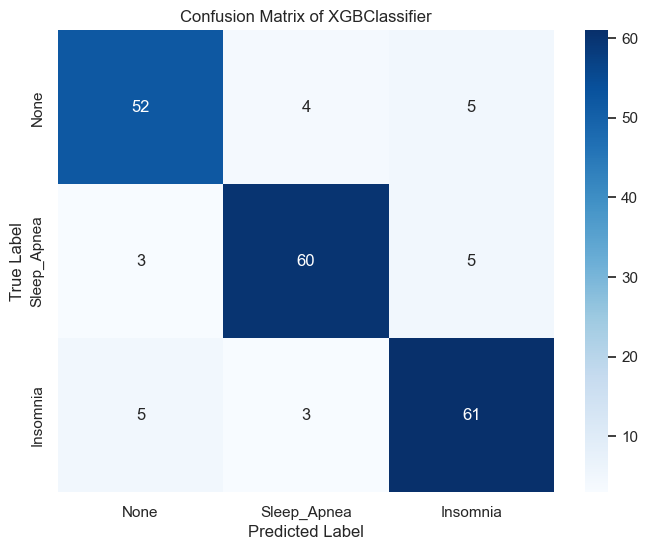

<Figure size 1000x800 with 0 Axes>

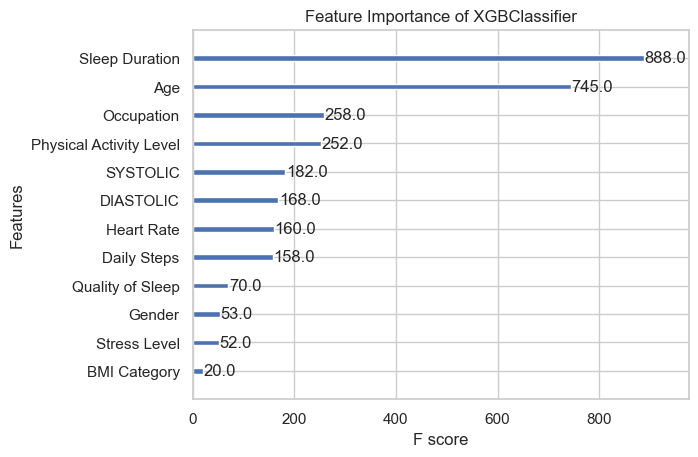


Feature Importance Statistics:
Mean Importance: 0.0833
Min Importance: 0.0026
Max Importance: 0.7238
Feature 0: 0.0141
Feature 1: 0.0037
Feature 2: 0.0416
Feature 3: 0.0038
Feature 4: 0.0026
Feature 5: 0.0148
Feature 6: 0.0077
Feature 7: 0.7238
Feature 8: 0.0288
Feature 9: 0.0400
Feature 10: 0.0358
Feature 11: 0.0832


In [143]:
import pickle
import numpy as np
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBClassifier with num_class for multi-class classification
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=3)

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

# Print the average and standard deviation of each metric from cross-validation
print("Cross-Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")

# Fit the model on the entire training data after cross-validation
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on test data
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['None', 'Sleep_Apnea', 'Insomnia'], yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBClassifier')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model)
plt.title('Feature Importance of XGBClassifier')
plt.show()

# Get feature importances from the model
importances = model.feature_importances_

# Calculate statistics for feature importance
mean_importance = np.mean(importances)
min_importance = np.min(importances)
max_importance = np.max(importances)

# Print the statistics of feature importances
print("\nFeature Importance Statistics:")
print(f"Mean Importance: {mean_importance:.4f}")
print(f"Min Importance: {min_importance:.4f}")
print(f"Max Importance: {max_importance:.4f}")

# Optionally, display the feature importance values for each feature
for idx, importance in enumerate(importances):
    print(f"Feature {idx}: {importance:.4f}")

# Save the trained model to a file with pickle
with open('xgb_model_Test.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [144]:
xgb_y_pred = model.predict(x_test)

# ROC Xgboost

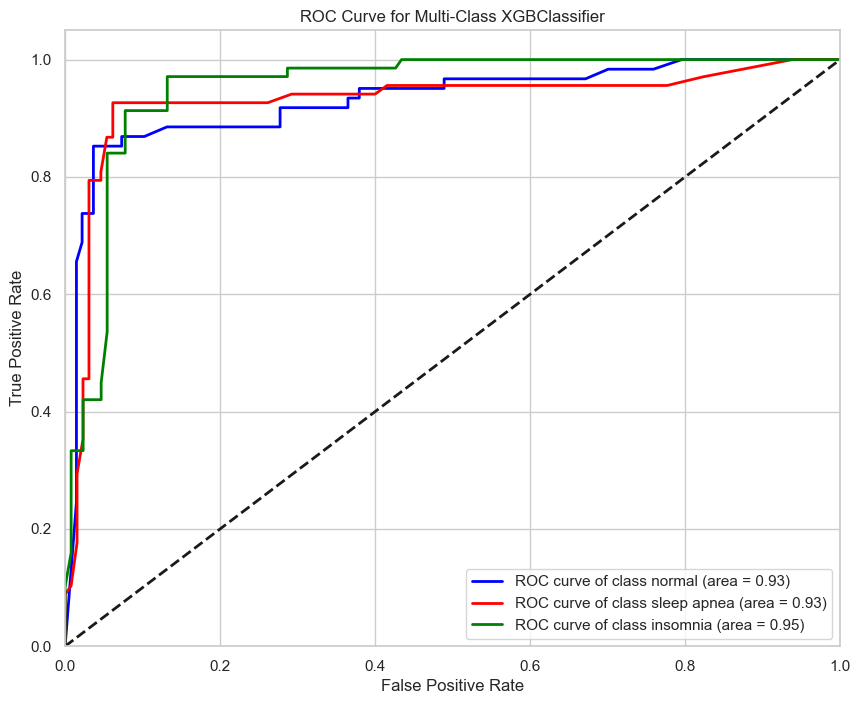

AUC for class normal: 0.93
AUC for class sleep apnea: 0.93
AUC for class insomnia: 0.95


In [145]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the output for multi-class ROC/AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Train the model with OneVsRest strategy if multi-class
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Class labels
class_names = ['normal', 'sleep apnea', 'insomnia']

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class XGBClassifier')
plt.legend(loc="lower right")
plt.show()

# Print the AUC for each class
for i in range(n_classes):
    print(f"AUC for class {class_names[i]}: {roc_auc[i]:.2f}")


# model xgboost dengan hyperparameter

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Cross-Validation Results:
Accuracy: 0.93 ± 0.02
Precision: 0.94 ± 0.02
Recall: 0.93 ± 0.02
F1-score: 0.93 ± 0.02

Test Data Evaluation:
Accuracy: 0.8787878787878788
Precision: 0.8791661662582482
Recall: 0.8787878787878788
F1-score: 0.8787472837118228


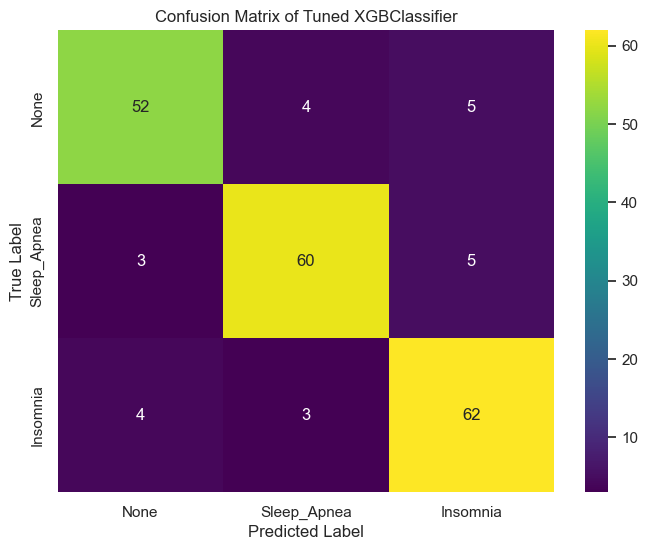

In [146]:
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi XGBClassifier (tanpa hyperparameter spesifik)
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Tentukan range hyperparameter yang akan dituning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2,0.3],      # Kecepatan pembelajaran
    'max_depth': [3, 5, 7,6],                 # Kedalaman maksimum dari setiap pohon
    'n_estimators': [100, 200, 300,500],        # Jumlah pohon
    'subsample': [0.8, 1.0],                # Persentase sampel data yang digunakan untuk setiap pohon
    'colsample_bytree': [0.8, 1.0]          # Persentase fitur yang digunakan untuk setiap pohon
}

# Tentukan cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definisikan scoring metrics untuk evaluasi
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Lakukan GridSearch untuk menemukan hyperparameter terbaik
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, refit='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Gunakan model terbaik untuk cross-validation
best_model = grid_search.best_estimator_

cv_results = cross_validate(best_model, x_train, y_train, cv=kfold, scoring=scoring)

# Tampilkan hasil cross-validation
print("\nCross-Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")

# Fit model terbaik pada seluruh data training
best_model.fit(x_train, y_train)

# Prediksi pada data test
y_pred = best_model.predict(x_test)

# Hitung metrik evaluasi pada data test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan metrik evaluasi pada data test
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['None', 'Sleep_Apnea', 'Insomnia'], yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Tuned XGBClassifier')
plt.show()

# Simpan model terbaik ke file menggunakan pickle
with open('xgb_model_tuned.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)


In [147]:
# Make predictions on the test data using the best tuned XGBClassifier
xgbhyperparameter_y_pred = best_model.predict(x_test)


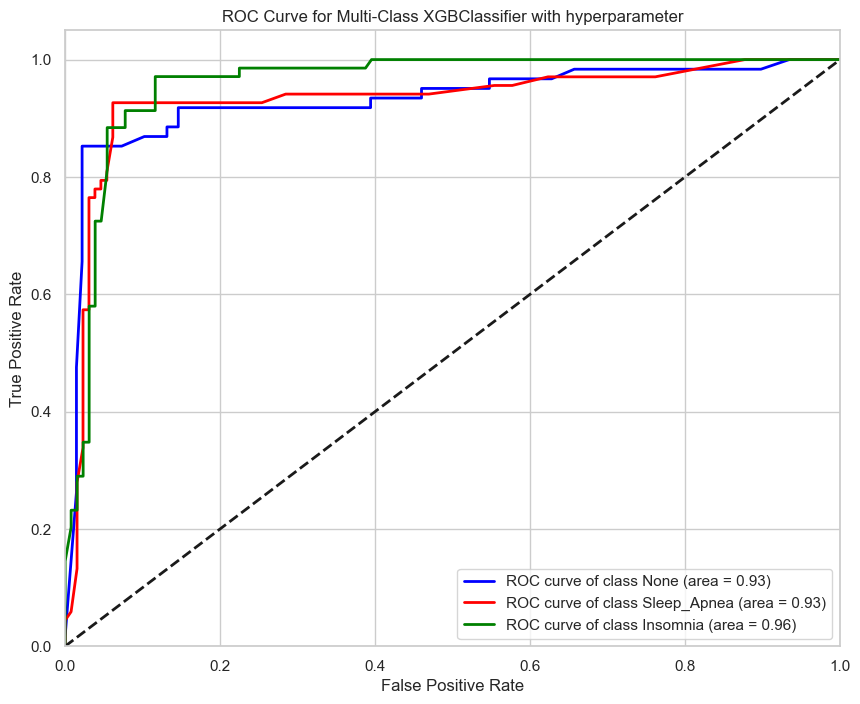

AUC for class None: 0.93
AUC for class Sleep_Apnea: 0.93
AUC for class Insomnia: 0.96


In [148]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the output for multi-class ROC/AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Train the XGBClassifier model with OneVsRest strategy for multi-class classification
classifier = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Class labels
class_names = ['None', 'Sleep_Apnea', 'Insomnia']

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class XGBClassifier with hyperparameter')
plt.legend(loc="lower right")
plt.show()

# Print the AUC for each class
for i in range(n_classes):
    print(f"AUC for class {class_names[i]}: {roc_auc[i]:.2f}")


# Random Forest Classifier

Cross-Validation Results:
Accuracy: 0.91 ± 0.01
Precision: 0.91 ± 0.01
Recall: 0.91 ± 0.01
F1-score: 0.91 ± 0.01

Test Data Evaluation:
Accuracy: 0.8787878787878788
Precision: 0.8793005815733089
Recall: 0.8787878787878788
F1-score: 0.8788188157475011


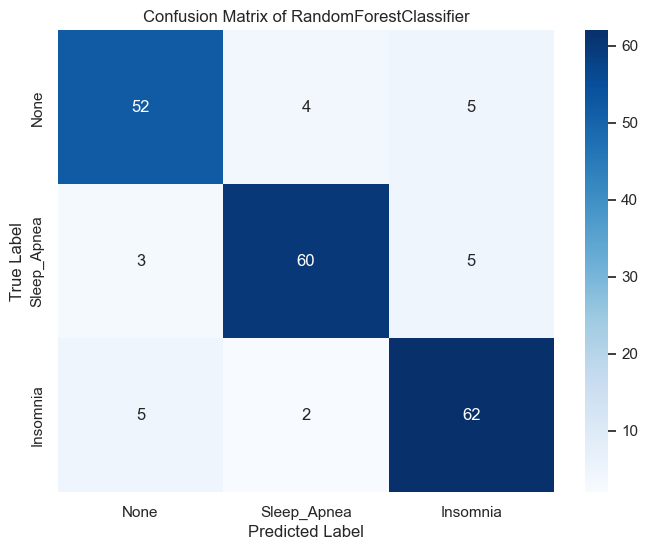

In [149]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

# Print the average and standard deviation of each metric from cross-validation
print("Cross-Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")

# Fit the model on the entire training data after cross-validation
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on test data
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['None', 'Sleep_Apnea', 'Insomnia'], yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()



In [150]:
# Make predictions on the test data using RandomForestClassifier
rfc_y_pred = model.predict(x_test)


# ROC Random Forest

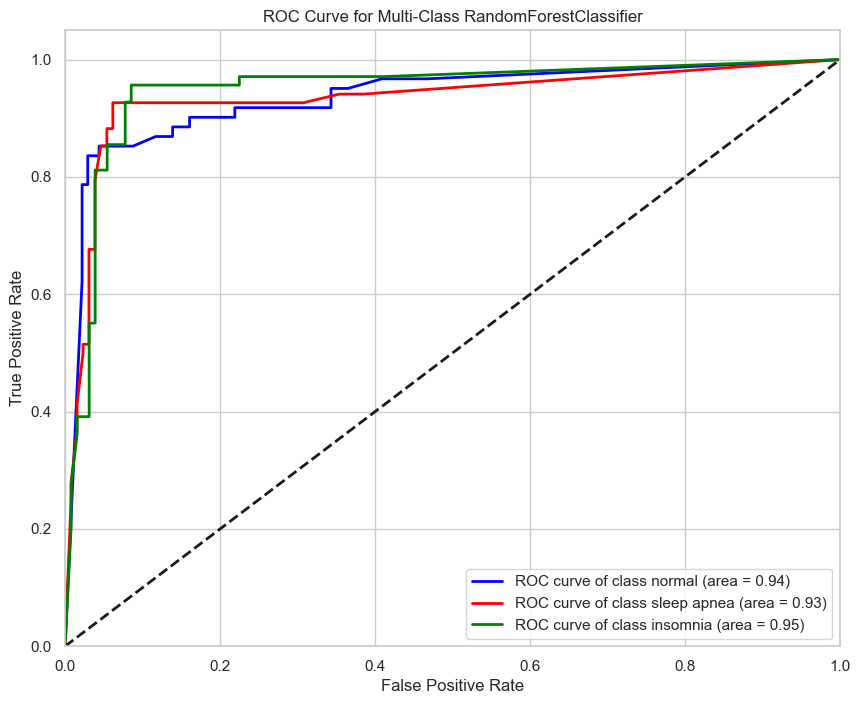

AUC for class normal: 0.94
AUC for class sleep apnea: 0.93
AUC for class insomnia: 0.95


In [151]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the output for multi-class ROC/AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Train the RandomForestClassifier model with OneVsRest strategy for multi-class classification
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Class labels
class_names = ['normal', 'sleep apnea', 'insomnia']

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

# Print the AUC for each class
for i in range(n_classes):
    print(f"AUC for class {class_names[i]}: {roc_auc[i]:.2f}")


# Gradient Boosting

Cross-Validation Results:
Accuracy: 0.91 ± 0.01
Precision: 0.91 ± 0.00
Recall: 0.91 ± 0.01
F1-score: 0.91 ± 0.01

Test Data Evaluation:
Accuracy: 0.8737373737373737
Precision: 0.8744431494431495
Recall: 0.8737373737373737
F1-score: 0.8737963541994898


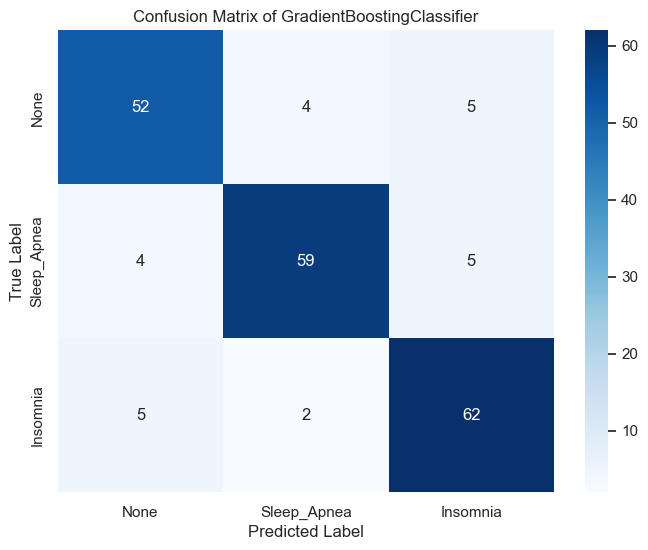

In [152]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

# Print the average and standard deviation of each metric from cross-validation
print("Cross-Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")

# Fit the model on the entire training data after cross-validation
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on test data
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['None', 'Sleep_Apnea', 'Insomnia'], yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of GradientBoostingClassifier')
plt.show()


In [153]:
# Make predictions on the test data using GradientBoostingClassifier
gbc_y_pred = model.predict(x_test)


# Roc Gradient Boosting

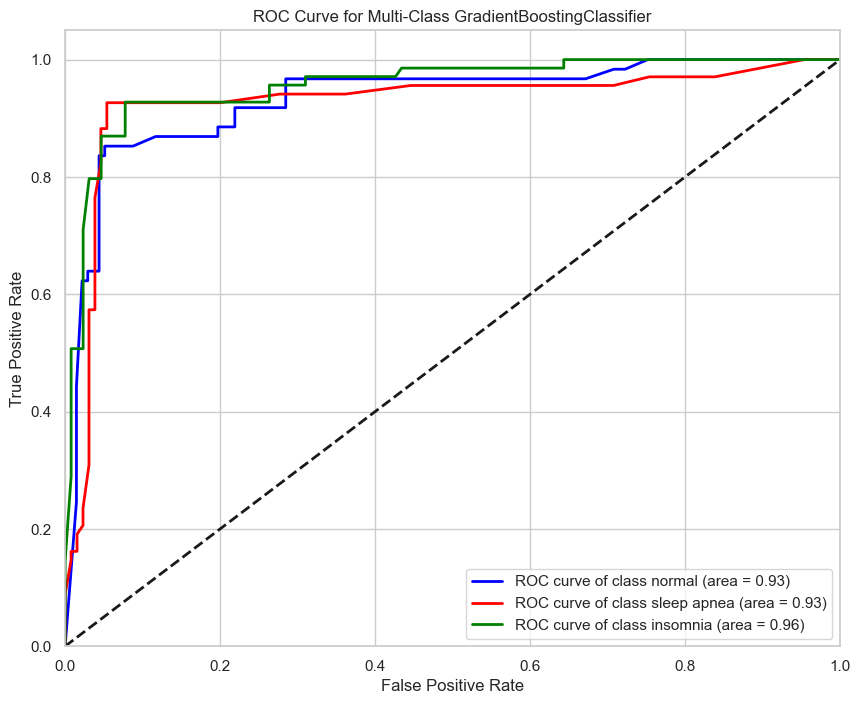

AUC for class normal: 0.93
AUC for class sleep apnea: 0.93
AUC for class insomnia: 0.96


In [154]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the output for multi-class ROC/AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Train the GradientBoostingClassifier model with OneVsRest strategy for multi-class classification
classifier = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Class labels
class_names = ['normal', 'sleep apnea', 'insomnia']

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class GradientBoostingClassifier')
plt.legend(loc="lower right")
plt.show()

# Print the AUC for each class
for i in range(n_classes):
    print(f"AUC for class {class_names[i]}: {roc_auc[i]:.2f}")


# Logistic Regression

Cross-Validation Results:
Accuracy: 0.91 ± 0.01
Precision: 0.91 ± 0.01
Recall: 0.91 ± 0.01
F1-score: 0.91 ± 0.01

Test Data Evaluation:
Accuracy: 0.8636363636363636
Precision: 0.8641470641428478
Recall: 0.8636363636363636
F1-score: 0.8635090399796282


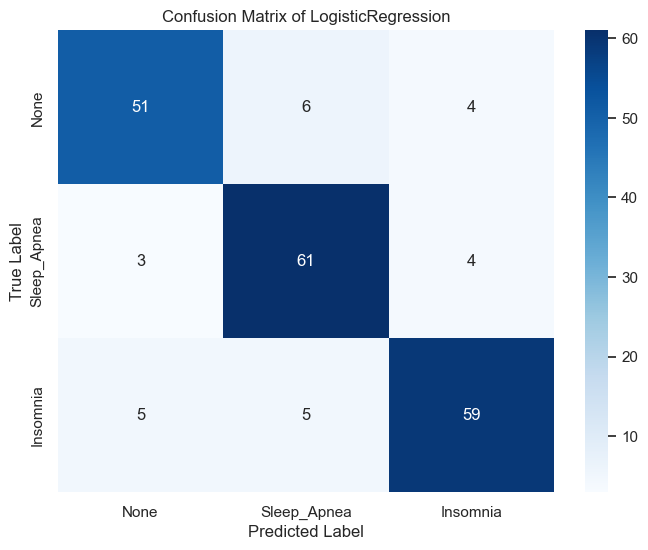

In [155]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the LogisticRegression
model = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

# Print the average and standard deviation of each metric from cross-validation
print("Cross-Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")

# Fit the model on the entire training data after cross-validation
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on test data
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['None', 'Sleep_Apnea', 'Insomnia'], yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of LogisticRegression')
plt.show()



In [156]:
# Make predictions on the test data using LogisticRegression
lr_y_pred = model.predict(x_test)


# Roc LogisticRegression

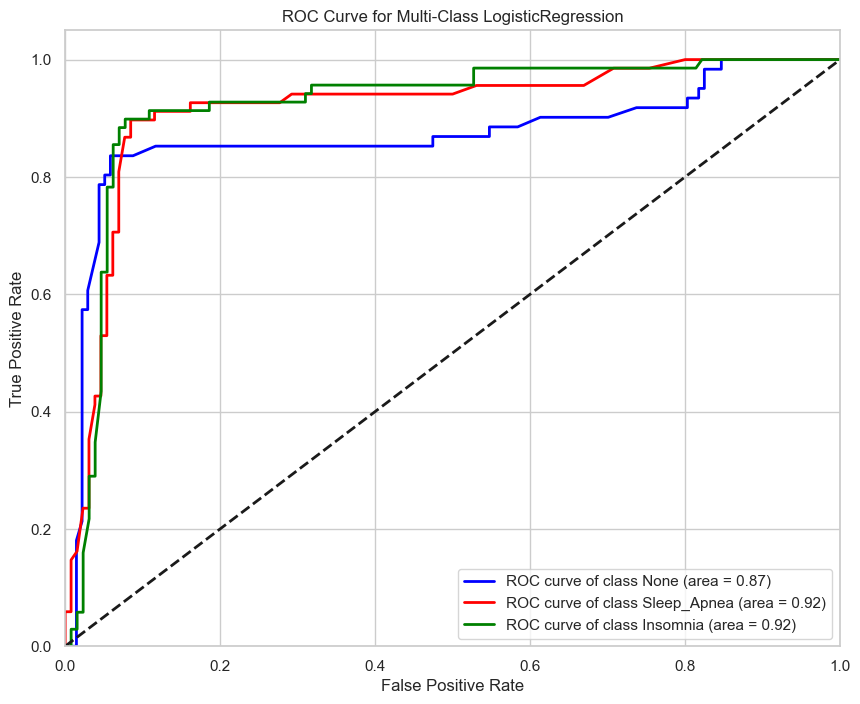

AUC for class None: 0.87
AUC for class Sleep_Apnea: 0.92
AUC for class Insomnia: 0.92


In [157]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the output for multi-class ROC/AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Train the LogisticRegression model with OneVsRest strategy for multi-class classification
classifier = OneVsRestClassifier(LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Class labels
class_names = ['None', 'Sleep_Apnea', 'Insomnia']

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class LogisticRegression')
plt.legend(loc="lower right")
plt.show()

# Print the AUC for each class
for i in range(n_classes):
    print(f"AUC for class {class_names[i]}: {roc_auc[i]:.2f}")


Cross-Validation Results:
Accuracy: 0.83 ± 0.05
Precision: 0.85 ± 0.04
Recall: 0.83 ± 0.05
F1-score: 0.83 ± 0.05

Test Data Evaluation:
Accuracy: 0.7525252525252525
Precision: 0.7666205433328721
Recall: 0.7525252525252525
F1-score: 0.7399524903759169


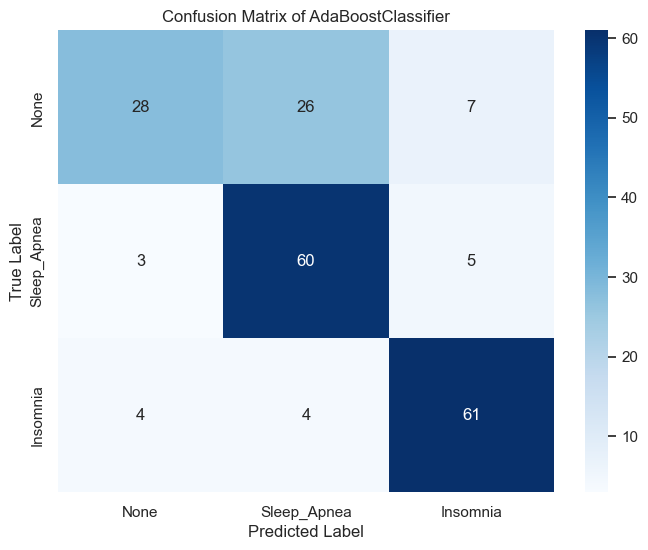

In [158]:
import pickle
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

# Print the average and standard deviation of each metric from cross-validation
print("Cross-Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")

# Fit the model on the entire training data after cross-validation
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on test data
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['None', 'Sleep_Apnea', 'Insomnia'], yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of AdaBoostClassifier')
plt.show()


In [159]:
# Menggunakan model AdaBoostClassifier yang sudah dilatih
abc_y_pred = model.predict(x_test)


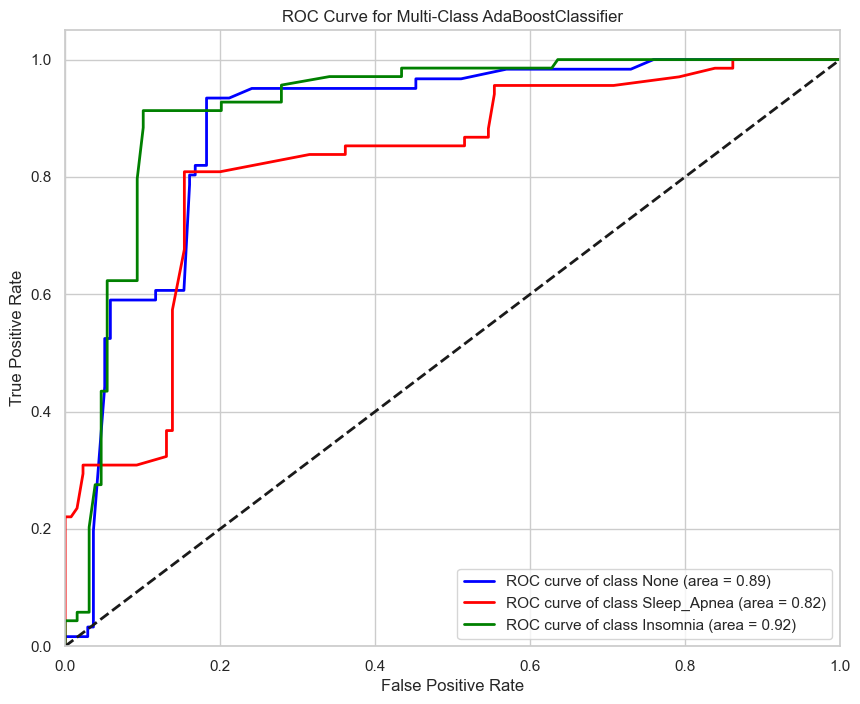

AUC for class None: 0.89
AUC for class Sleep_Apnea: 0.82
AUC for class Insomnia: 0.92


In [160]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the output for multi-class ROC/AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Train the AdaBoostClassifier model with OneVsRest strategy for multi-class classification
classifier = OneVsRestClassifier(AdaBoostClassifier(n_estimators=100, random_state=42))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Class labels
class_names = ['None', 'Sleep_Apnea', 'Insomnia']

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class AdaBoostClassifier')
plt.legend(loc="lower right")
plt.show()

# Print the AUC for each class
for i in range(n_classes):
    print(f"AUC for class {class_names[i]}: {roc_auc[i]:.2f}")


# Evaluasi Confusion matix

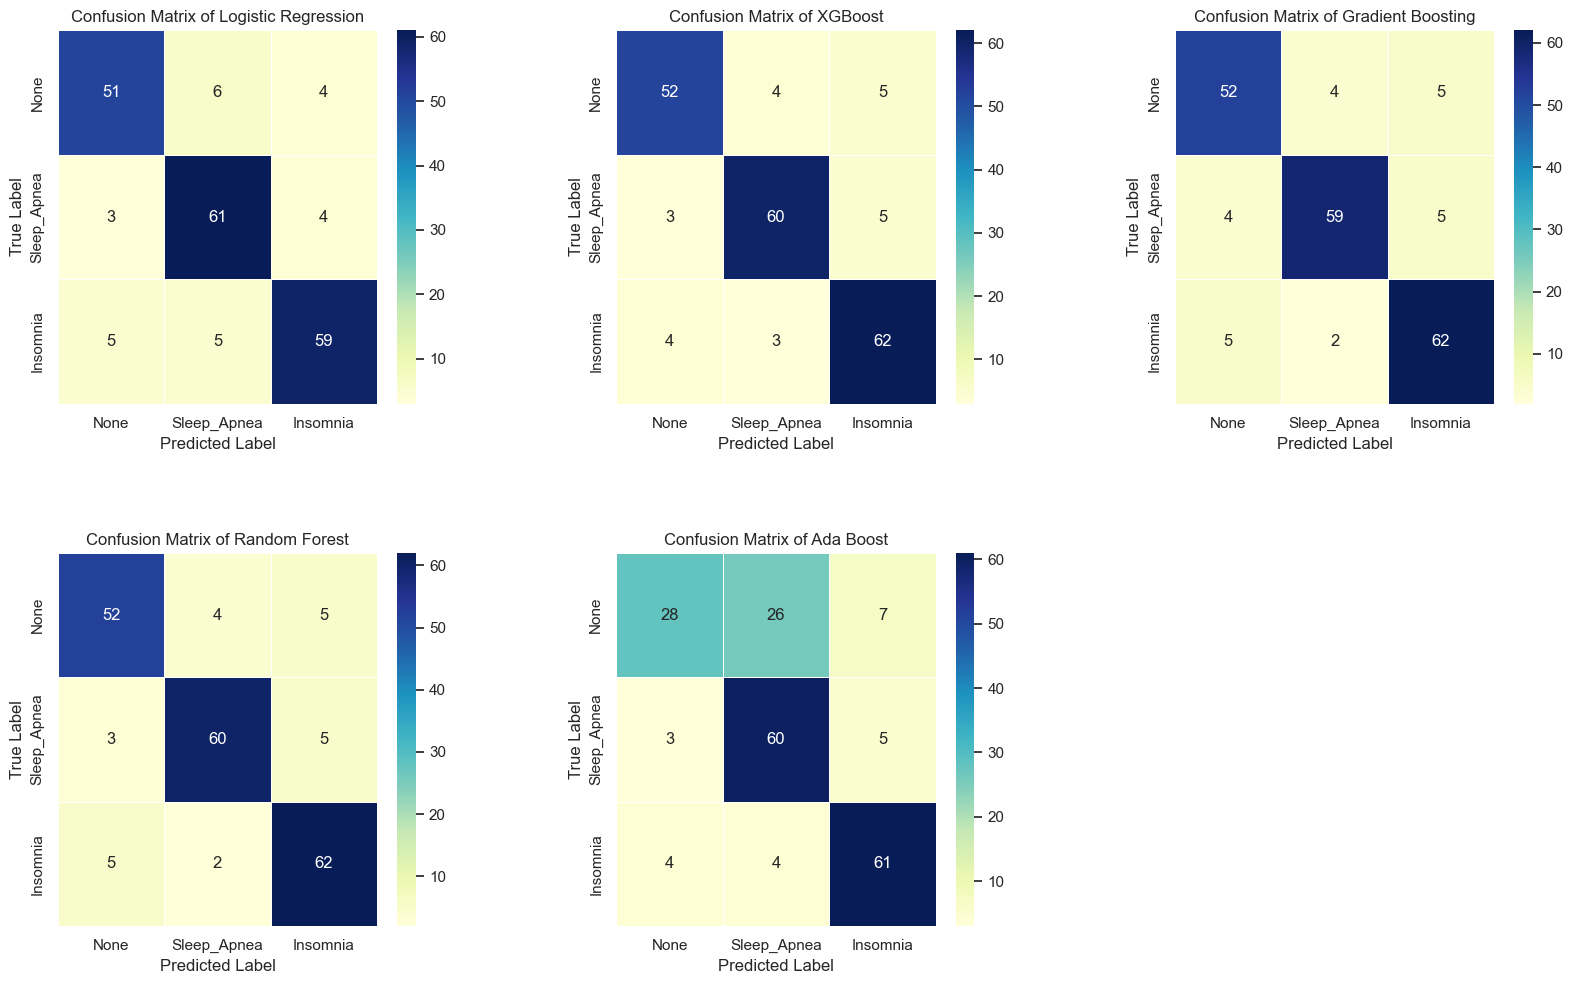

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Asumsi: lr_y_pred, gbc_y_pred, rfc_y_pred, xgb_y_pred, xgbhyperparameter_y_pred sudah tersedia
models_predictions = [lr_y_pred,xgbhyperparameter_y_pred, gbc_y_pred, rfc_y_pred,abc_y_pred]
model_names = ['Logistic Regression', 'XGBoost', 'Gradient Boosting', 'Random Forest', 'Ada Boost']

plt.figure(figsize=(16, 10))

for i, (y_pred, model_name) in enumerate(zip(models_predictions, model_names), 1):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 3, i)  # Diubah menjadi 2x3 grid untuk menampung 5 confusion matrix
    sns.heatmap(cm, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d',
                xticklabels=['None', 'Sleep_Apnea', 'Insomnia'],
                yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
    
    plt.title('Confusion Matrix of ' + model_name)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Sesuaikan tata letak untuk jarak yang lebih baik
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


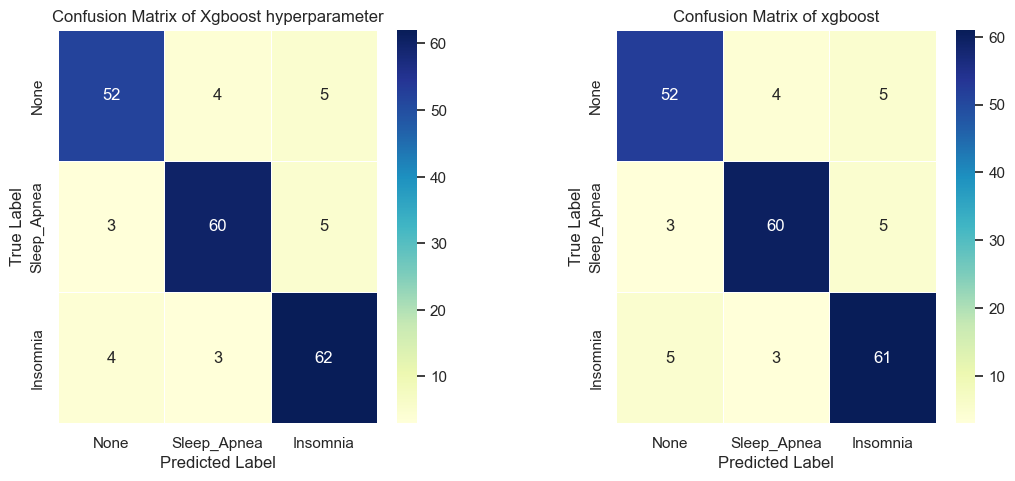

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Asumsi: lr_y_pred, gbc_y_pred, rfc_y_pred, xgb_y_pred, xgbhyperparameter_y_pred sudah tersedia
models_predictions = [xgbhyperparameter_y_pred,xgb_y_pred]
model_names = ['Xgboost hyperparameter','xgboost']

plt.figure(figsize=(16, 10))

for i, (y_pred, model_name) in enumerate(zip(models_predictions, model_names), 1):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 3, i)  # Diubah menjadi 2x3 grid untuk menampung 5 confusion matrix
    sns.heatmap(cm, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d',
                xticklabels=['None', 'Sleep_Apnea', 'Insomnia'],
                yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
    
    plt.title('Confusion Matrix of ' + model_name)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Sesuaikan tata letak untuk jarak yang lebih baik
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


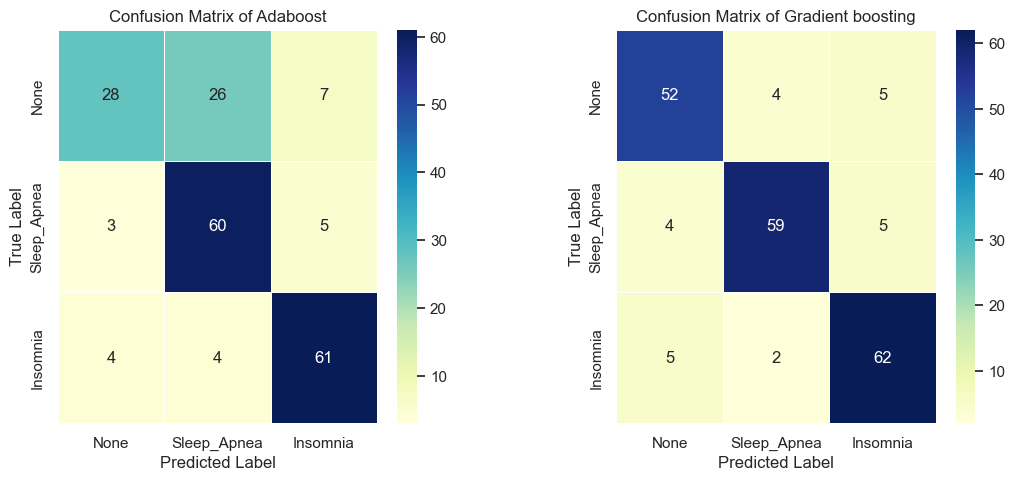

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Asumsi: lr_y_pred, gbc_y_pred, rfc_y_pred, xgb_y_pred, xgbhyperparameter_y_pred sudah tersedia
models_predictions = [abc_y_pred,gbc_y_pred]
model_names = ['Adaboost','Gradient boosting']

plt.figure(figsize=(16, 10))

for i, (y_pred, model_name) in enumerate(zip(models_predictions, model_names), 1):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 3, i)  # Diubah menjadi 2x3 grid untuk menampung 5 confusion matrix
    sns.heatmap(cm, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d',
                xticklabels=['None', 'Sleep_Apnea', 'Insomnia'],
                yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
    
    plt.title('Confusion Matrix of ' + model_name)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Sesuaikan tata letak untuk jarak yang lebih baik
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


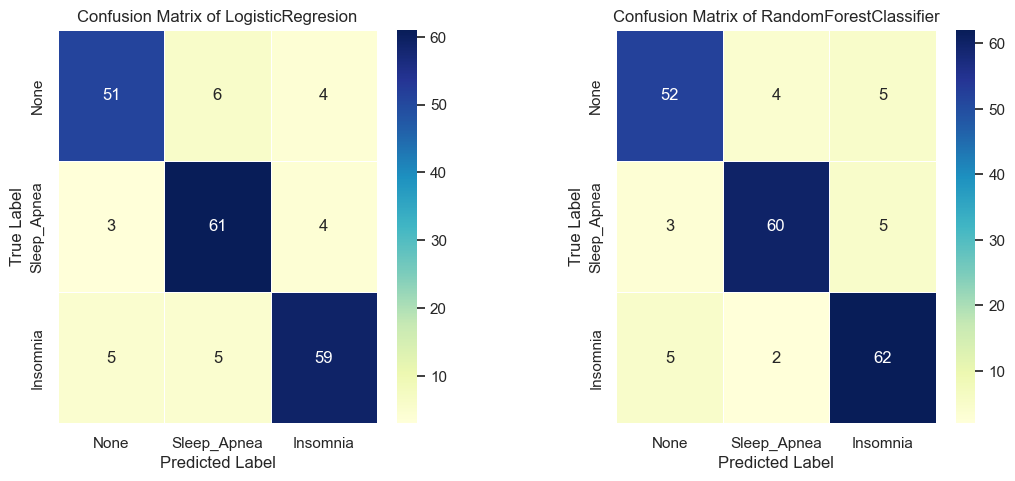

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Asumsi: lr_y_pred, gbc_y_pred, rfc_y_pred, xgb_y_pred, xgbhyperparameter_y_pred sudah tersedia
models_predictions = [lr_y_pred, rfc_y_pred]
model_names = ['LogisticRegresion','RandomForestClassifier']

plt.figure(figsize=(16, 10))

for i, (y_pred, model_name) in enumerate(zip(models_predictions, model_names), 1):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 3, i)  # Diubah menjadi 2x3 grid untuk menampung 5 confusion matrix
    sns.heatmap(cm, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d',
                xticklabels=['None', 'Sleep_Apnea', 'Insomnia'],
                yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
    
    plt.title('Confusion Matrix of ' + model_name)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Sesuaikan tata letak untuk jarak yang lebih baik
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


# Evaluasi Hasil ROC dari model yang di coba

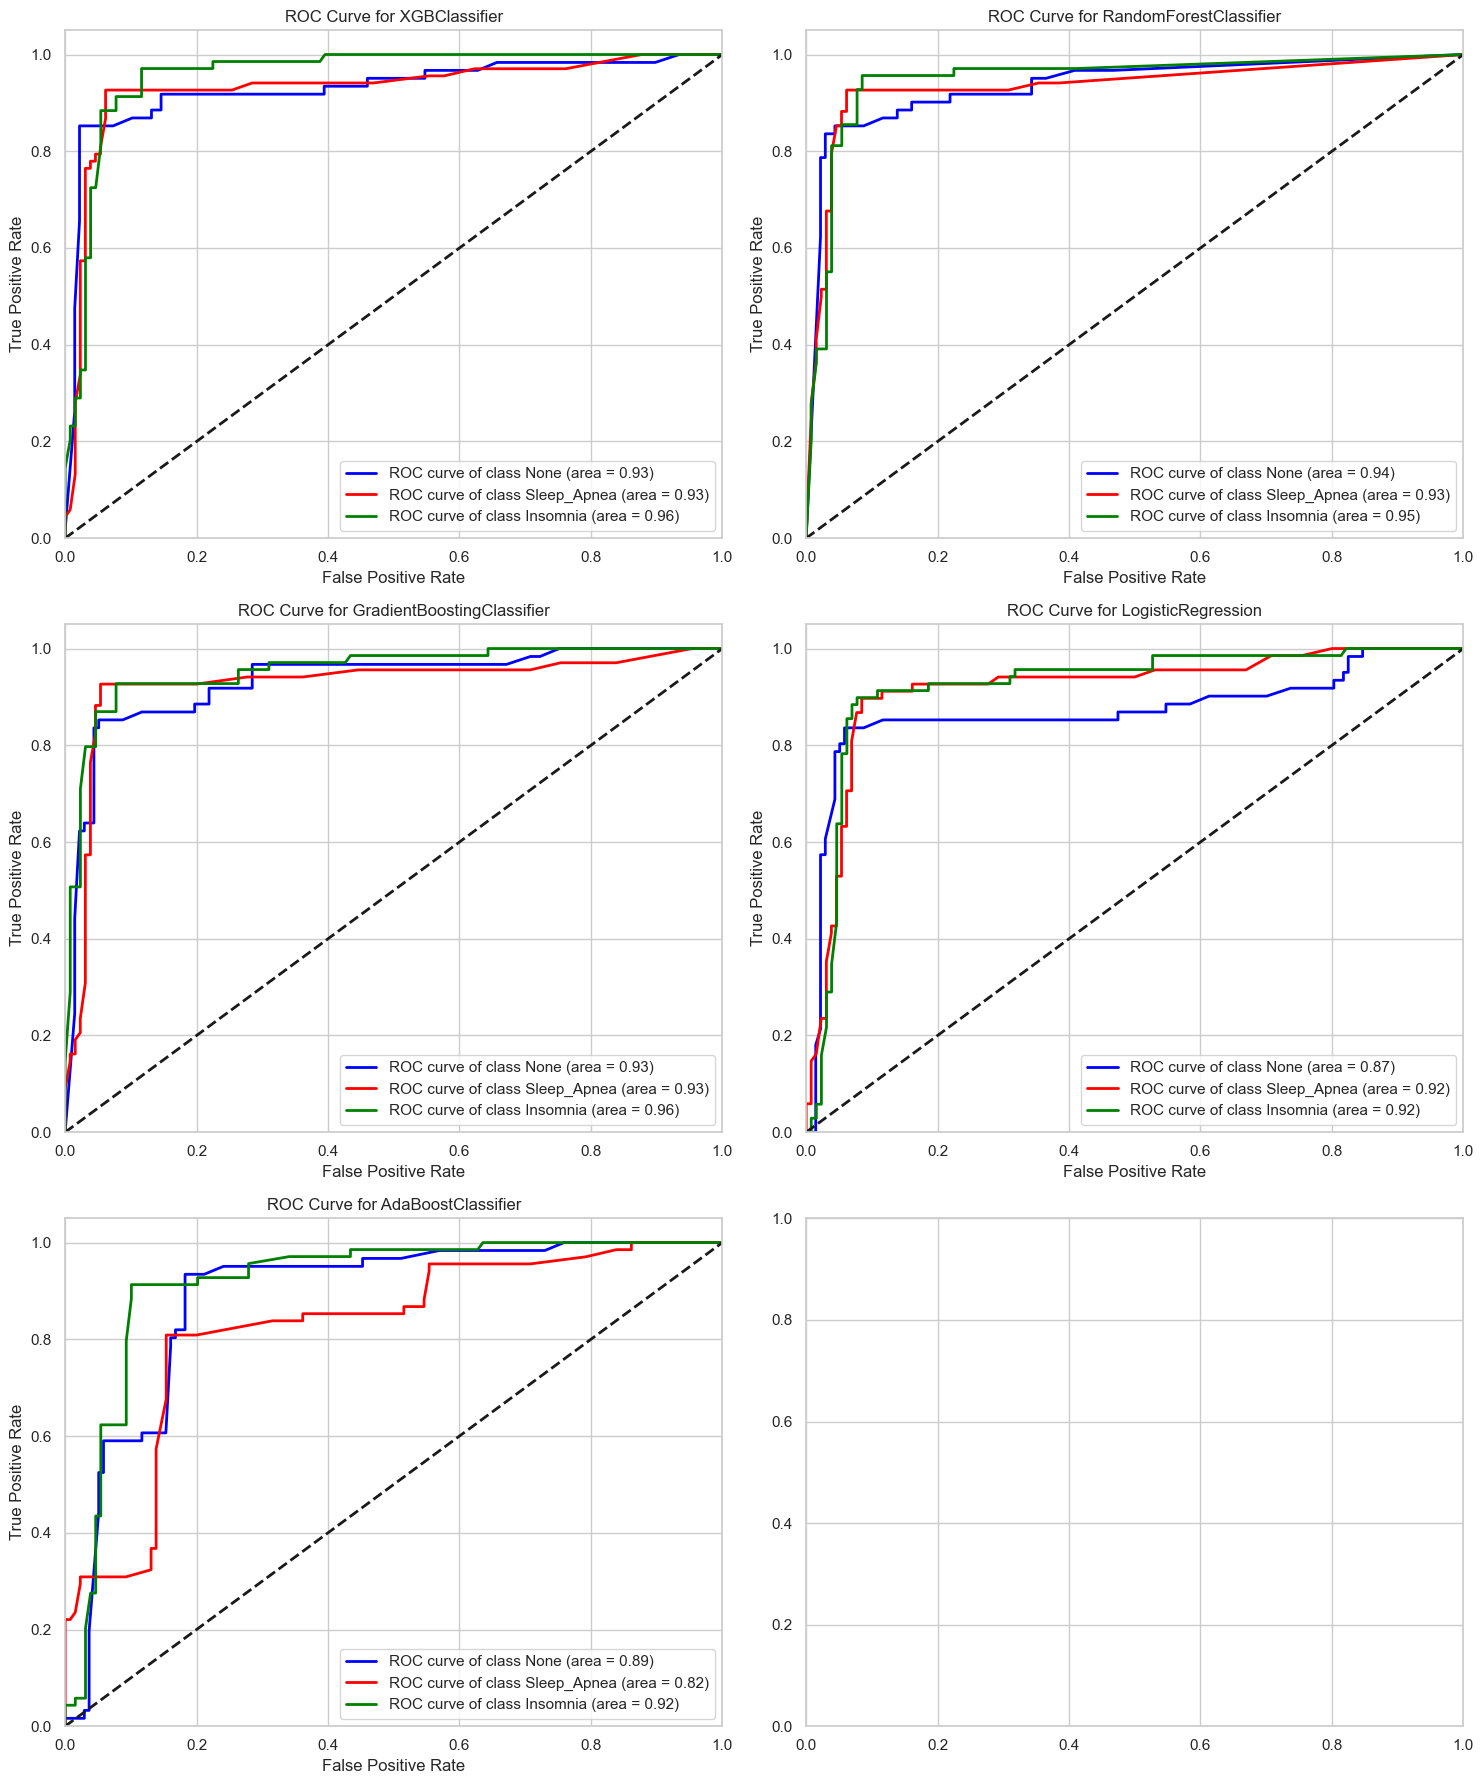


XGBClassifier AUC Scores:
AUC for class None: 0.93
AUC for class Sleep_Apnea: 0.93
AUC for class Insomnia: 0.96

RandomForestClassifier AUC Scores:
AUC for class None: 0.94
AUC for class Sleep_Apnea: 0.93
AUC for class Insomnia: 0.95

GradientBoostingClassifier AUC Scores:
AUC for class None: 0.93
AUC for class Sleep_Apnea: 0.93
AUC for class Insomnia: 0.96

LogisticRegression AUC Scores:
AUC for class None: 0.87
AUC for class Sleep_Apnea: 0.92
AUC for class Insomnia: 0.92

AdaBoostClassifier AUC Scores:
AUC for class None: 0.89
AUC for class Sleep_Apnea: 0.82
AUC for class Insomnia: 0.92


In [165]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Binarize the output for multi-class ROC/AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Define models including AdaBoostClassifier
models = {
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=100, random_state=42)  # Adding AdaBoostClassifier
}

# Set up the matplotlib figure
fig, axs = plt.subplots(3, 2, figsize=(15, 18))  # Adjusted to fit additional model
axs = axs.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Plot ROC curves for each model
for ax, (model_name, model) in zip(axs, models.items()):
    # Train and predict probabilities
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print AUC for each class for each model
for model_name, model in models.items():
    print(f'\n{model_name} AUC Scores:')
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(x_train, y_train).predict_proba(x_test)
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        print(f"AUC for class {class_names[i]}: {roc_auc:.2f}")

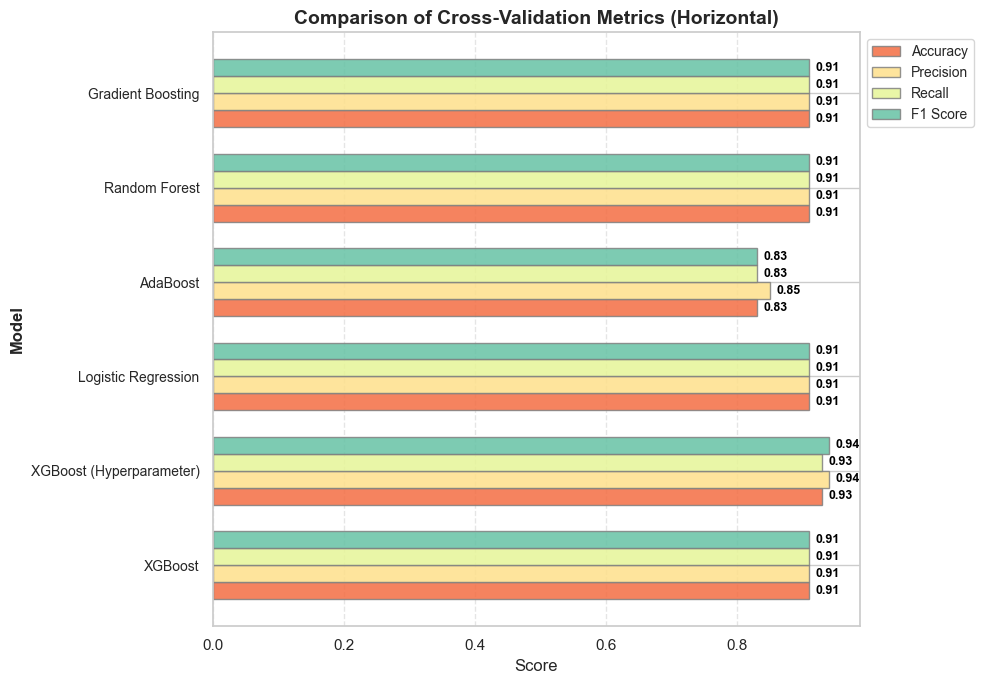

In [166]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Menggunakan tema Seaborn untuk tampilan yang lebih modern
sns.set_theme(style="whitegrid")

# Contoh hasil cross-validation untuk beberapa model
models = ['XGBoost', 'XGBoost (Hyperparameter)', 'Logistic Regression', 'AdaBoost', 'Random Forest', 'Gradient Boosting']
accuracy = [0.91, 0.93, 0.91, 0.83, 0.91, 0.91]
precision = [0.91, 0.94, 0.91, 0.85, 0.91, 0.91]
recall = [0.91, 0.93, 0.91, 0.83, 0.91, 0.91]
f1_score = [0.91, 0.94, 0.91, 0.83, 0.91, 0.91]

# Lebar bar chart
bar_width = 0.18

# Posisi bar horizontal
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Menggunakan palet warna yang lebih menarik dari Seaborn
colors = sns.color_palette("Spectral", n_colors=4)

# Plot bar chart horizontal dengan transparansi dan warna lebih menarik
plt.figure(figsize=(10, 7))

plt.barh(r1, accuracy, color=colors[0], height=bar_width, edgecolor='grey', label='Accuracy', alpha=0.85)
plt.barh(r2, precision, color=colors[1], height=bar_width, edgecolor='grey', label='Precision', alpha=0.85)
plt.barh(r3, recall, color=colors[2], height=bar_width, edgecolor='grey', label='Recall', alpha=0.85)
plt.barh(r4, f1_score, color=colors[3], height=bar_width, edgecolor='grey', label='F1 Score', alpha=0.85)

# Menambahkan label dan judul
plt.ylabel('Model', fontweight='bold', fontsize=12)
plt.yticks([r + bar_width*1.5 for r in range(len(models))], models, fontsize=10)
plt.xlabel('Score', fontsize=12)
plt.title('Comparison of Cross-Validation Metrics (Horizontal)', fontsize=14, fontweight='bold')

# Menambahkan garis grid yang halus
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Menambahkan anotasi di samping bar untuk setiap nilai
for i in range(len(models)):
    plt.text(accuracy[i] + 0.01, r1[i], f'{accuracy[i]:.2f}', va='center', color='black', fontweight='bold', fontsize=9)
    plt.text(precision[i] + 0.01, r2[i], f'{precision[i]:.2f}', va='center', color='black', fontweight='bold', fontsize=9)
    plt.text(recall[i] + 0.01, r3[i], f'{recall[i]:.2f}', va='center', color='black', fontweight='bold', fontsize=9)
    plt.text(f1_score[i] + 0.01, r4[i], f'{f1_score[i]:.2f}', va='center', color='black', fontweight='bold', fontsize=9)

# Menambahkan legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Menambahkan padding agar plot tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


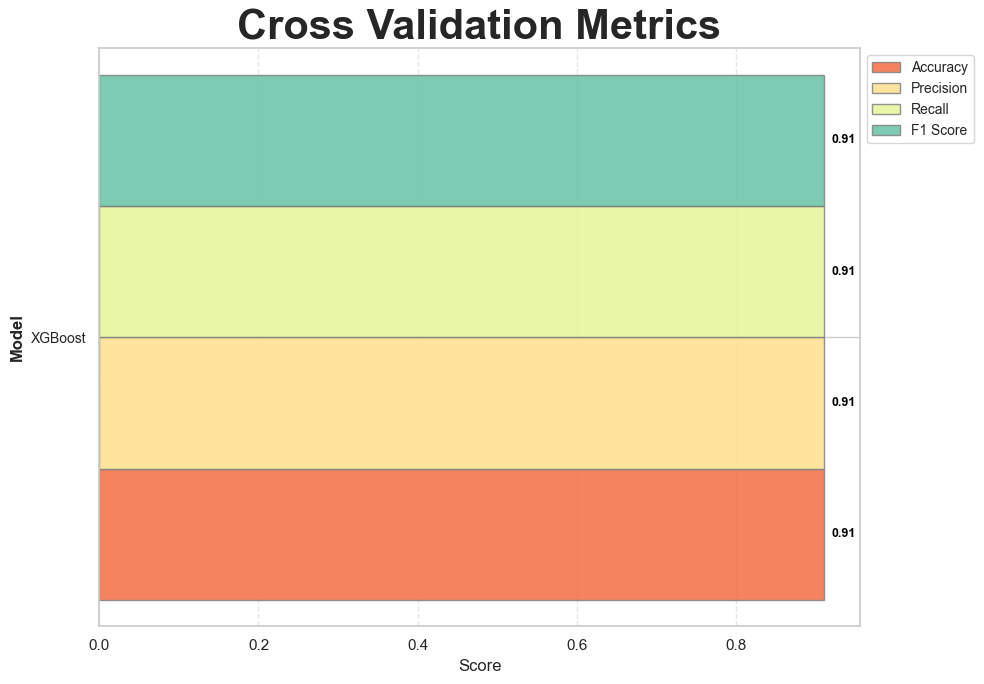

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Menggunakan tema Seaborn untuk tampilan yang lebih modern
sns.set_theme(style="whitegrid")

# Contoh hasil cross-validation untuk beberapa model
models = ['XGBoost']
accuracy = [0.91]
precision = [0.91]
recall = [0.91]
f1_score = [0.91]

# Lebar bar chart
bar_width = 0.18

# Posisi bar horizontal
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Menggunakan palet warna yang lebih menarik dari Seaborn
colors = sns.color_palette("Spectral", n_colors=4)

# Plot bar chart horizontal dengan transparansi dan warna lebih menarik
plt.figure(figsize=(10, 7))

plt.barh(r1, accuracy, color=colors[0], height=bar_width, edgecolor='grey', label='Accuracy', alpha=0.85)
plt.barh(r2, precision, color=colors[1], height=bar_width, edgecolor='grey', label='Precision', alpha=0.85)
plt.barh(r3, recall, color=colors[2], height=bar_width, edgecolor='grey', label='Recall', alpha=0.85)
plt.barh(r4, f1_score, color=colors[3], height=bar_width, edgecolor='grey', label='F1 Score', alpha=0.85)

# Menambahkan label dan judul
plt.ylabel('Model', fontweight='bold', fontsize=12)
plt.yticks([r + bar_width*1.5 for r in range(len(models))], models, fontsize=10)
plt.xlabel('Score', fontsize=12)
plt.title('Cross Validation Metrics', fontsize=30, fontweight='bold')

# Menambahkan garis grid yang halus
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Menambahkan anotasi di samping bar untuk setiap nilai
for i in range(len(models)):
    plt.text(accuracy[i] + 0.01, r1[i], f'{accuracy[i]:.2f}', va='center', color='black', fontweight='bold', fontsize=9)
    plt.text(precision[i] + 0.01, r2[i], f'{precision[i]:.2f}', va='center', color='black', fontweight='bold', fontsize=9)
    plt.text(recall[i] + 0.01, r3[i], f'{recall[i]:.2f}', va='center', color='black', fontweight='bold', fontsize=9)
    plt.text(f1_score[i] + 0.01, r4[i], f'{f1_score[i]:.2f}', va='center', color='black', fontweight='bold', fontsize=9)

# Menambahkan legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Menambahkan padding agar plot tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()
